# Introduction

### In a world where businesses are growing tremendously, and cater to a large number of customers on a regular basis. It becomes very essential for businesses to categorize their customers. Customer segmentation is an effective tool for businesses to closely align their strategy and tactics with, and better target, their customers. Every customer is different and every customer journey is different so a single approach often isn’t going to work for all. This is where customer segmentation becomes a valuable process.

# Problem Description

### To bulid RFM Value and categorize the customers for given Data set

##  This project has been completed in 5 steps :-
## 1. Data Cleaning
## 2. Exploratory Data Analysis (EDA)
## 3. Data Transformation
## 4. Clustering and segmentation
## 5. Data visulization


# 1) Importing the data and Cleaning

In [1]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import datetime as dt
import numpy as np
import squarify
import plotly.express as px
import regex as re
import plotly.graph_objects as go


here we will read our data and go through the columns and rows for further development


In [2]:
df = pd.read_csv('sales_data.csv')

In [3]:
df.head(10)

CustomerID  TOTAL_ORDERS   REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22           124  11986.54                96.67            529.59   
1          29            82  11025.96               134.46             97.92   
2          83            43   7259.69               168.83            171.69   
3          95            44   6992.27               158.92             92.82   
4         124            55   6263.44               113.88            179.04   
5         153            49   5841.24               119.21             96.84   
6         187            43   5470.27               127.22            128.77   
7         219            54   5200.53                96.31            237.53   
8         258            19   4967.06               261.42             51.91   
9         308            21   4726.38               225.07             63.88   

   AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  AVGDAYSBETWEENORDERS  \
0             4.27        30-Dec-16         24-Oct-21                 14.19   
1             1.19        31-Mar-18         24-Oct-21                 15.89   
2             3.99        30-Nov-17         24-Oct-21                 33.12   
3             2.11         9-Apr-19         24-Oct-21                 21.11   
4             3.26        23-Oct-20         24-Oct-21                  6.65   
5             1.98        26-Jul-15         24-Oct-21                 46.57   
6             2.99        14-Jan-19         24-Oct-21                 23.58   
7             4.40        19-Nov-19         24-Oct-21                 13.06   
8             2.73         3-Mar-21         24-Oct-21                 12.37   
9             3.04         6-Jan-20         24-Oct-21                 31.29   

   DAYSSINCELASTORDER  ...  WEEK3_DAY16_DAY23_REVENUE  \
0                   1  ...                    2592.18   
1                   1  ...                    2807.66   
2                   1  ...                     713.94   
3                   1  ...                     997.02   
4                   1  ...                    2725.66   
5                   1  ...                    1595.97   
6                   1  ...                    2042.31   
7                   1  ...                     754.72   
8                   1  ...                    2588.19   
9                   1  ...                    1094.98   

   WEEK4_DAY24_DAY31_REVENUE  TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  \
0                    2409.71                     12                     61   
1                    4106.19                      1                     13   
2                    2861.90                      0                      6   
3                    1260.08                      0                     10   
4                     768.46                      6                      9   
5                    1447.96                      0                     20   
6                    2699.47                      2                      0   
7                    1339.16                      2                     22   
8                     563.74                      1                      0   
9                     991.97                      4                     11   

   TIME_1200_1800_ORDERS  TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  \
0                     37                     14                 1067.92   
1                     24                     44                   30.25   
2                     12                     25                    0.00   
3                     13                     21                    0.00   
4                     27                     13                  501.34   
5                     23                      6                    0.00   
6                     19                     22                   47.00   
7                     24                      6                  273.18   
8                      8                     10                  332.19   
9              

In [4]:
df.columns

Index(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'],
    

In [5]:
df.shape

(5000, 40)

In [6]:
df.dtypes

CustomerID                     int64
TOTAL_ORDERS                   int64
REVENUE                      float64
AVERAGE_ORDER_VALUE          float64
CARRIAGE_REVENUE             float64
AVERAGESHIPPING              float64
FIRST_ORDER_DATE              object
LATEST_ORDER_DATE             object
AVGDAYSBETWEENORDERS         float64
DAYSSINCELASTORDER             int64
MONDAY_ORDERS                  int64
TUESDAY_ORDERS                 int64
WEDNESDAY_ORDERS               int64
THURSDAY_ORDERS                int64
FRIDAY_ORDERS                  int64
SATURDAY_ORDERS                int64
SUNDAY_ORDERS                  int64
MONDAY_REVENUE               float64
TUESDAY_REVENUE              float64
WEDNESDAY_REVENUE            float64
THURSDAY_REVENUE             float64
FRIDAY_REVENUE               float64
SATURDAY_REVENUE             float64
SUNDAY_REVENUE               float64
WEEK1_DAY01_DAY07_ORDERS       int64
WEEK2_DAY08_DAY15_ORDERS       int64
WEEK3_DAY16_DAY23_ORDERS       int64
W

Different type of datatype in data set

## Data Cleaning and handleing for missing value
* It is very important to clean the data and find the missing values as it may affect our model 
* I am using an lib called missingo to verify the miising values in data sets
* It returns a graph as we can easily visualise the data set


In [7]:
df.describe()

CustomerID  TOTAL_ORDERS       REVENUE  AVERAGE_ORDER_VALUE  \
count    5000.000000    5000.00000   5000.000000          5000.000000   
mean    40709.227800      12.87040   1681.523840           136.537378   
std     49949.848017      12.67988   1998.618678            91.651569   
min         1.000000       1.00000     38.500000            10.680000   
25%      1687.500000       3.00000    315.097500            83.025000   
50%     13765.000000       8.00000    966.725000           113.160000   
75%     71891.500000      20.00000   2493.072500           160.272500   
max    277160.000000     156.00000  34847.400000          1578.880000   

       CARRIAGE_REVENUE  AVERAGESHIPPING  AVGDAYSBETWEENORDERS  \
count       5000.000000      5000.000000           5000.000000   
mean          46.036376         3.592574            163.159618   
std           47.879226         2.021360            259.699496   
min            0.000000         0.000000              0.000000   
25%            9.980000         2.500000             21.670000   
50%           24.985000         3.660000             57.635000   
75%           76.862500         4.790000            170.357500   
max          529.590000        35.990000           1409.500000   

       DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  ...  \
count         5000.000000    5000.000000      5000.00000  ...   
mean            87.420000       1.629000         1.75440  ...   
std             80.156513       2.236506         2.43394  ...   
min              1.000000       0.000000         0.00000  ...   
25%              7.000000       0.000000         0.00000  ...   
50%             68.000000       1.000000         1.00000  ...   
75%            171.250000       2.000000         3.00000  ...   
max            207.000000      19.000000        23.00000  ...   

       WEEK3_DAY16_DAY23_REVENUE  WEEK4_DAY24_DAY31_REVENUE  \
count                5000.000000                5000.000000   
mean                  421.826908                 474.462852   
std                   643.449120                 617.579321   
min                     0.000000                   0.000000   
25%                     0.000000                  80.000000   
50%                   194.990000                 264.485000   
75%                   604.085000                 651.487500   
max                 12946.220000                8274.970000   

       TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  TIME_1200_1800_ORDERS  \
count            5000.000000            5000.000000            5000.000000   
mean                1.028800               3.746200               4.434000   
std                 2.174331               4.700234               5.044793   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               1.000000               1.000000   
50%                 0.000000               2.000000               3.000000   
75%                 1.000000               6.000000               7.000000   
max                34.000000              61.000000              58.000000   

       TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  TIME_0601_1200_REVENUE  \
count            5000.000000             5000.000000             5000.000000   
mean                3.661400              131.062636              486.863868   
std                 4.581894              331.289349              789.029911   
min                 0.000000                0.000000                0.000000   
25%                 1.000000                0.000000               35.000000   
50%                 2.000000                0.000000              236.440000   
75%                 5.000000              131.282500              661.952500   
max                64.000000             7700.240000            23832.770000   

       TIME_1200_1800_REVENUE  TIME_1801_2359_REVENUE  
count             5000.000000             5000.000000  
mean               584.731626              478.865710  
std        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 5000 non-null   int64  
 1   TOTAL_ORDERS               5000 non-null   int64  
 2   REVENUE                    5000 non-null   float64
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64
 4   CARRIAGE_REVENUE           5000 non-null   float64
 5   AVERAGESHIPPING            5000 non-null   float64
 6   FIRST_ORDER_DATE           5000 non-null   object 
 7   LATEST_ORDER_DATE          5000 non-null   object 
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64
 9   DAYSSINCELASTORDER         5000 non-null   int64  
 10  MONDAY_ORDERS              5000 non-null   int64  
 11  TUESDAY_ORDERS             5000 non-null   int64  
 12  WEDNESDAY_ORDERS           5000 non-null   int64  
 13  THURSDAY_ORDERS            5000 non-null   int64

<AxesSubplot:>

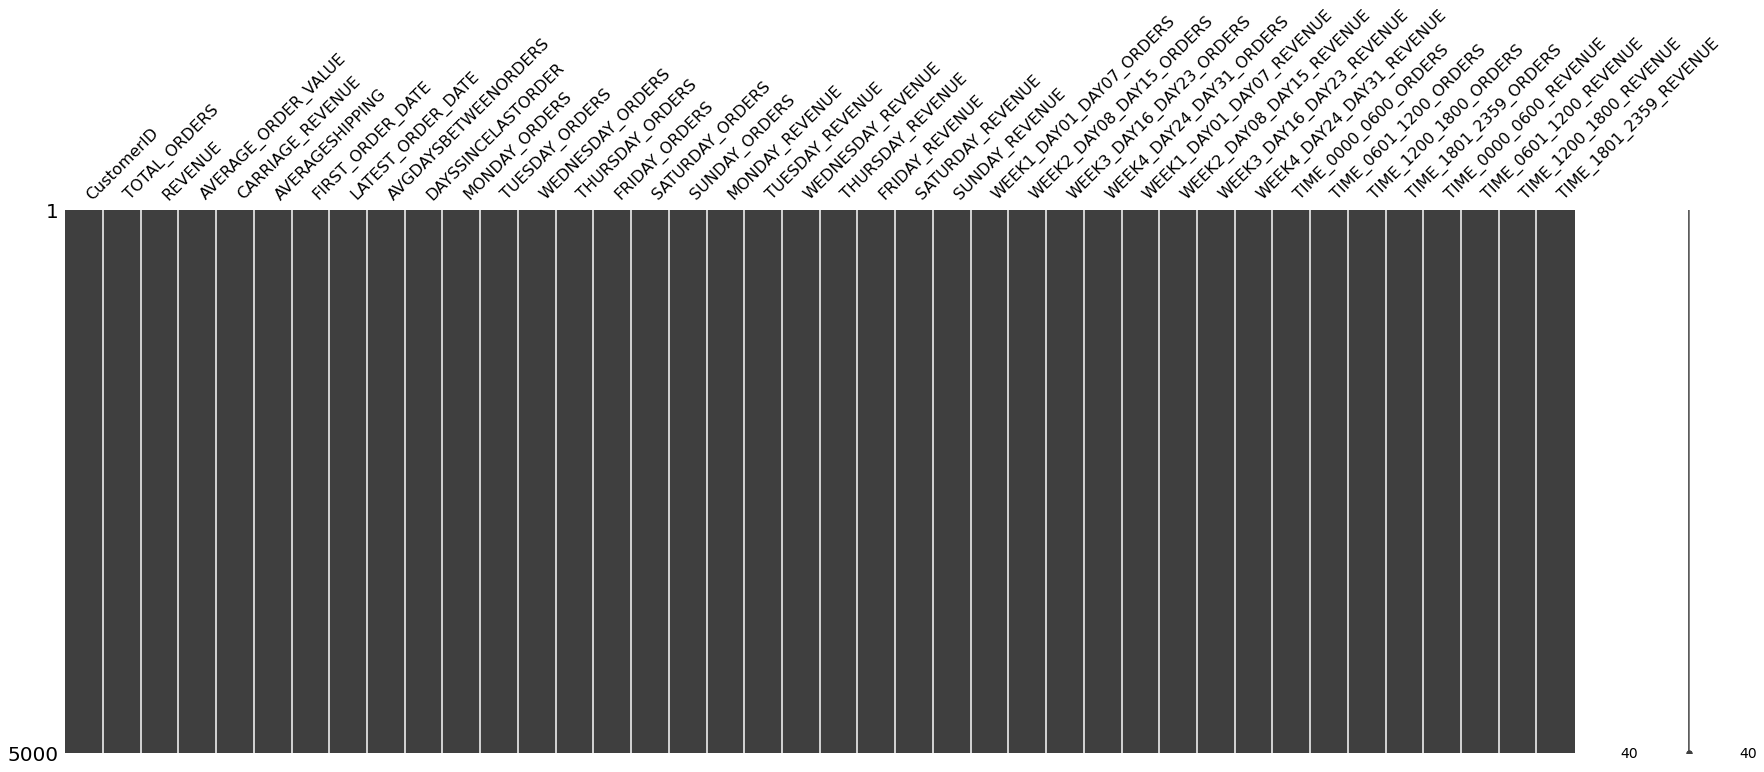

In [9]:
missingno.matrix(df,figsize=(30,10))

* ### hear we can see the data set is clean and their is no missing value 

# 2) EDA 

In EDA we are trying to figure out more about the data so you can build a model the best way you can.we usually do this when you first look at a dataset but it'll continually happen as you learn more. EDA is an iterative process. There's no one way to do it either. It'll vary with each new dataset

* the basic idea is
* 1) to make our RFM model based on customer Data
* 2) to Know on which day, week of month the customer is active so we can give special deals
* 3) this data set is clean and do not have any typo error

###  1)Top ten highest revenue 

In [10]:
top_revenue = df['REVENUE'].sort_values(ascending = False)[:10]

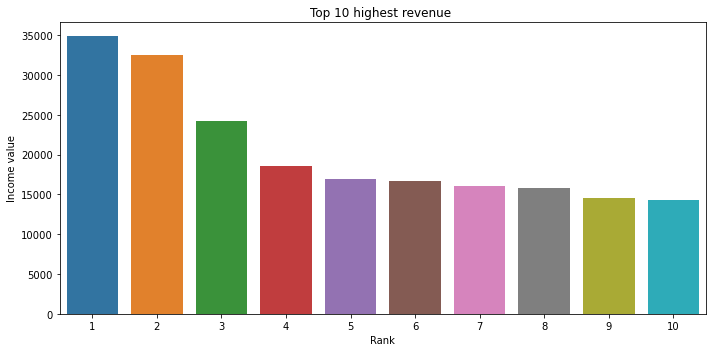

In [11]:
plt.figure(figsize = (10,5))
sns.barplot(x = [1,2,3,4,5,6,7,8,9,10], y = top_revenue)
plt.xlabel('Rank')
plt.ylabel('Income value')
plt.title('Top 10 highest revenue ')
plt.tight_layout()

### 2) Top ten highest orders

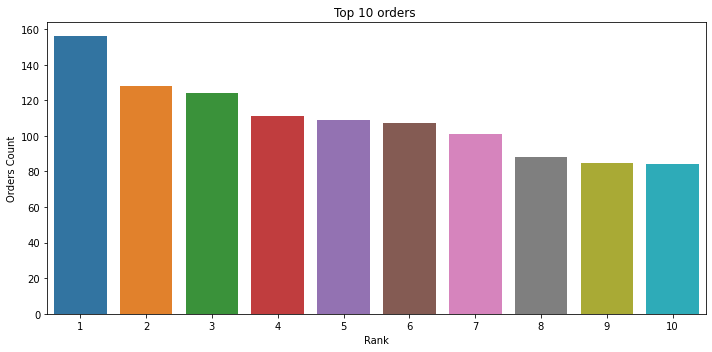

In [12]:
top_orders = df['TOTAL_ORDERS'].sort_values(ascending = False)[:10]
plt.figure(figsize = (10,5))
sns.barplot(x = [1,2,3,4,5,6,7,8,9,10], y = top_orders)
plt.xlabel('Rank')
plt.ylabel('Orders Count')
plt.title('Top 10 orders ')
plt.tight_layout()

## 3) Days of week


### weekly purchaces

In [13]:
df_dates = df[['MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE']]

In [14]:
df_dates.head()

MONDAY_ORDERS  TUESDAY_ORDERS  WEDNESDAY_ORDERS  THURSDAY_ORDERS  \
0             13              13                29               25   
1             11              13                10               13   
2              5               4                 3                5   
3             10               8                 5                8   
4              2               3                 8                8   

   FRIDAY_ORDERS  SATURDAY_ORDERS  SUNDAY_ORDERS  MONDAY_REVENUE  \
0             19               15             10         1287.50   
1             14               10             11         1253.08   
2              5                8             13          698.95   
3              5                3              5         1753.95   
4             12               10             12          150.98   

   TUESDAY_REVENUE  WEDNESDAY_REVENUE  THURSDAY_REVENUE  FRIDAY_REVENUE  \
0          1054.15            2842.52           2133.79         2051.94   
1          2003.25            1819.75           1114.83         1791.86   
2           504.97             197.97           1182.97          733.96   
3          1400.23             570.48           1154.06          798.07   
4           330.38            1090.23            563.63         1339.44   

   SATURDAY_REVENUE  SUNDAY_REVENUE  
0           1496.33         1120.31  
1           1624.34         1418.85  
2           1223.96         2716.91  
3            630.00          685.48  
4            956.56         1832.22

In [15]:
sum_of_orders = df_dates[['MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE']].sum()

In [16]:
sum_of_orders = pd.DataFrame(sum_of_orders)

### Orders

In [17]:
# making number of order on any week day 
orders_day = pd.DataFrame(sum_of_orders[:7] )
orders_day.reset_index(inplace = True)
orders_day.rename(columns = {'index':'Day',0:'NO_of_Orders'},inplace = True)
# removing "_"orders to make everything look clean
orders_day['Day']=orders_day['Day'].str.split('_').str[0]

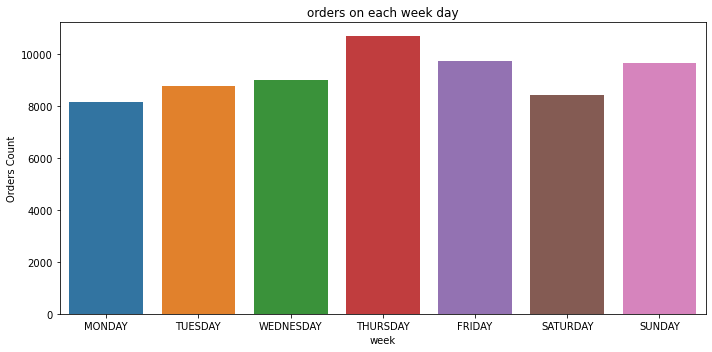

In [18]:
plt.figure(figsize = (10,5))
sns.barplot(x = orders_day['Day'], y = orders_day['NO_of_Orders'])
plt.xlabel('week')
plt.ylabel('Orders Count')
plt.title('orders on each week day')
plt.tight_layout()

### Revenue

In [19]:
# making total revenue on any week day 
revenue_day = pd.DataFrame(sum_of_orders[7:])
revenue_day.reset_index(inplace = True)
revenue_day.rename(columns = {'index':'Day',0:'Sum_of_Revenue'},inplace = True)

In [20]:
# removing "_"orders to make everything look clean
revenue_day['Day']=revenue_day['Day'].str.split('_').str[0]

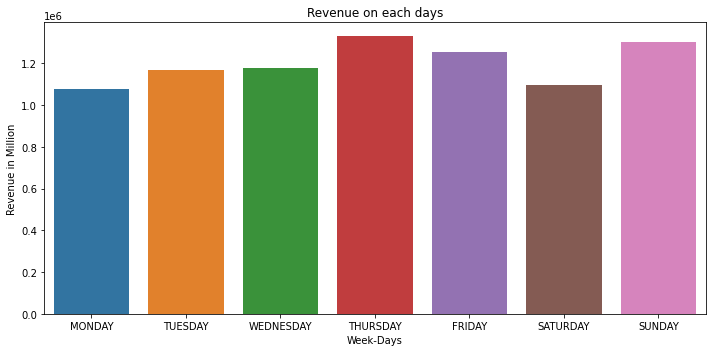

In [21]:
plt.figure(figsize = (10,5))
sns.barplot(x = revenue_day['Day'], y = revenue_day['Sum_of_Revenue'])
plt.xlabel('Week-Days')
plt.ylabel('Revenue in Million')
plt.title('Revenue on each days')
plt.tight_layout()

## From the plot for Weekly purchases it is seen that most of the purchases, occur in the Thursday Followed by Sunday and friday


* #### now we got orders_day and revenue_day

In [22]:
#combain to make it one df
revenue_day['NO_of_Orders'] = orders_day['NO_of_Orders']

In [23]:
# normalizing the revenue to make easy plot as revenue is in millions so dividing by 100 we will
# get in 10k range
revenue_day['Sum_of_Revenue_in_100'] = revenue_day['Sum_of_Revenue']/100

## 4) Week's in Month

### total months can be calucalted form first_order and last order 

In [24]:
df_Fday = pd.to_datetime(df['FIRST_ORDER_DATE'].min())
df_Lday = pd.to_datetime(df['LATEST_ORDER_DATE'].max())

In [25]:
# Finding to days years and months
total_days = (df_Lday-df_Fday).days
total_Year = total_days/365
total_month = total_Year*12

In [26]:
df_months = df[['WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE']]
rename =['WEEK1_ORDERS',
       'WEEK2_ORDERS', 'WEEK3_ORDERS',
       'WEEK4_ORDERS', 'WEEK1_REVENUE',
       'WEEK2_REVENUE', 'WEEK3_REVENUE',
       'WEEK4_REVENUE']
columns = ['WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS',
       'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS',
       'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE',
       'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE']
df_months = pd.DataFrame(df_months)
# changing column names
k = {}
for i,(x,y) in enumerate(zip(columns,rename)):
    k[x] = y
df_months.rename(columns = k, inplace = True)       

In [27]:
df_months

WEEK1_ORDERS  WEEK2_ORDERS  WEEK3_ORDERS  WEEK4_ORDERS  WEEK1_REVENUE  \
0               28            42            30            24        2685.37   
1               18            19            19            26        1336.09   
2                9            11             6            17        2299.93   
3               12            15             9             8        2317.95   
4               10            18            21             6         831.14   
...            ...           ...           ...           ...            ...   
4995             1             0             0             0         117.49   
4996             1             0             0             0         117.49   
4997             1             0             0             0         117.49   
4998             1             0             0             0         117.49   
4999             1             0             0             1          44.19   

      WEEK2_REVENUE  WEEK3_REVENUE  WEEK4_REVENUE  
0           4299.28        2592.18        2409.71  
1           2776.02        2807.66        4106.19  
2           1383.92         713.94        2861.90  
3           2417.22         997.02        1260.08  
4           1938.18        2725.66         768.46  
...             ...            ...            ...  
4995           0.00           0.00           0.00  
4996           0.00           0.00           0.00  
4997           0.00           0.00           0.00  
4998           0.00           0.00           0.00  
4999           0.00           0.00          49.95  

[5000 rows x 8 columns]

In [28]:
df_months_ = df_months[['WEEK1_ORDERS',
       'WEEK2_ORDERS', 'WEEK3_ORDERS',
       'WEEK4_ORDERS', 'WEEK1_REVENUE',
       'WEEK2_REVENUE', 'WEEK3_REVENUE',
       'WEEK4_REVENUE']].sum()
df_months_=pd.DataFrame(df_months_)

### Orders

In [29]:
#month order
df_months_order = pd.DataFrame(df_months_[:4])
df_months_order.reset_index(inplace = True)
df_months_order.rename(columns = {'index':'Week_Num',0:'NUM_of_Orders'} , inplace = True)
df_months_order

Week_Num  NUM_of_Orders
0  WEEK1_ORDERS        14989.0
1  WEEK2_ORDERS        15313.0
2  WEEK3_ORDERS        16150.0
3  WEEK4_ORDERS        17900.0

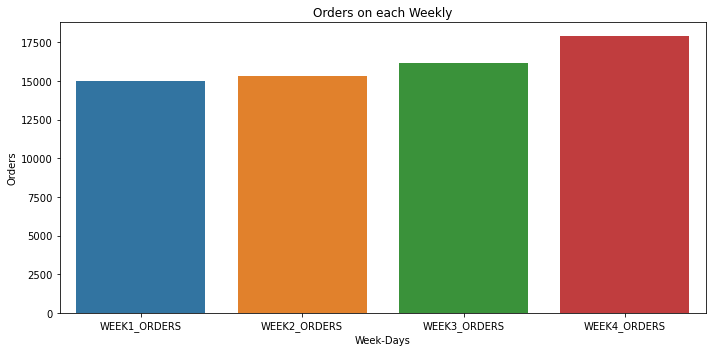

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(x = df_months_order['Week_Num'], y = df_months_order['NUM_of_Orders'])
plt.xlabel('Week-Days')
plt.ylabel('Orders')
plt.title('Orders on each Weekly')
plt.tight_layout()

### Revenue

In [31]:

df_months_revenue = pd.DataFrame(df_months_[4:])
df_months_revenue.reset_index(inplace = True)
df_months_revenue.rename(columns = {'index':'Week_Num',0:'Revenue'} , inplace = True)
df_months_revenue

Week_Num     Revenue
0  WEEK1_REVENUE  1893191.73
1  WEEK2_REVENUE  2032978.67
2  WEEK3_REVENUE  2109134.54
3  WEEK4_REVENUE  2372314.26

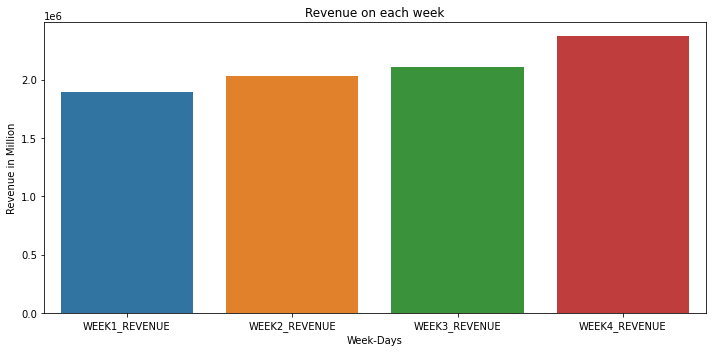

In [32]:
plt.figure(figsize = (10,5))
sns.barplot(x = df_months_revenue['Week_Num'], y = df_months_revenue['Revenue'])
plt.xlabel('Week-Days')
plt.ylabel('Revenue in Million')
plt.title('Revenue on each week')
plt.tight_layout()

## From the Above plot's. it is seen that most of the purchases, occur in the Week-4 


## 4) Time of Day

In [33]:
df_time = pd.DataFrame(df[['TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE']])
df_time_ = df_time[['TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE']].sum()
df_time_ = pd.DataFrame(df_time_)

### Orders

In [34]:
df_Time_order = pd.DataFrame(df_time_[:4])
df_Time_order.reset_index(inplace = True)
df_Time_order.rename(columns = {'index':'Timings',0:'NUM_of_Orders'} , inplace = True)
df_Time_order

Timings  NUM_of_Orders
0  TIME_0000_0600_ORDERS         5144.0
1  TIME_0601_1200_ORDERS        18731.0
2  TIME_1200_1800_ORDERS        22170.0
3  TIME_1801_2359_ORDERS        18307.0

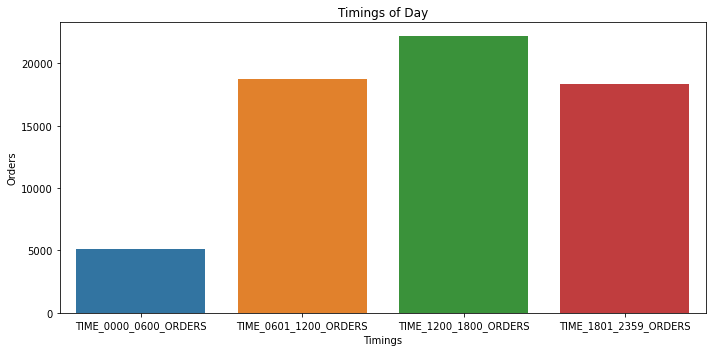

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(x = df_Time_order['Timings'][:10], y = df_Time_order['NUM_of_Orders'][:10])
plt.xlabel('Timings')
plt.ylabel('Orders')
plt.title('Timings of Day')
plt.tight_layout()

### Revenue

In [36]:
df_Time_revenue = pd.DataFrame(df_time_[4:])
df_Time_revenue.reset_index(inplace = True)
df_Time_revenue.rename(columns = {'index':'Timings',0:'Revenue'} , inplace = True)
df_Time_revenue 

Timings     Revenue
0  TIME_0000_0600_REVENUE   655313.18
1  TIME_0601_1200_REVENUE  2434319.34
2  TIME_1200_1800_REVENUE  2923658.13
3  TIME_1801_2359_REVENUE  2394328.55

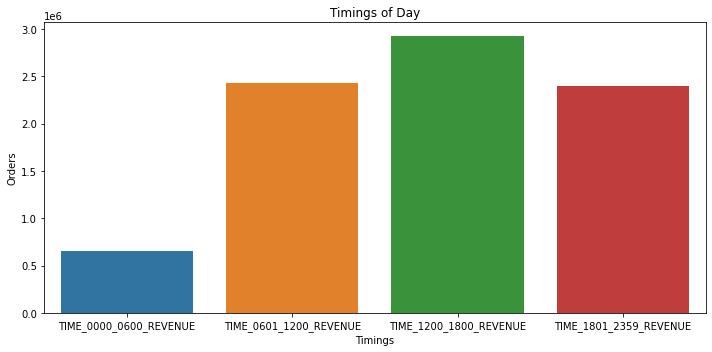

In [37]:
plt.figure(figsize = (10,5))
sns.barplot(x = df_Time_revenue['Timings'], y = df_Time_revenue['Revenue'])
plt.xlabel('Timings')
plt.ylabel('Orders')
plt.title('Timings of Day')
plt.tight_layout()

## 5) Customer with high revenue and high order

In [38]:
df_customer = pd.DataFrame(df[['CustomerID','REVENUE','TOTAL_ORDERS']])
df_customer_revenue = pd.DataFrame(df[['CustomerID','REVENUE']])
df_customer_orders = pd.DataFrame(df[['CustomerID','TOTAL_ORDERS']])

### Orders

In [39]:
df_customer_orders .sort_values(by =['TOTAL_ORDERS'],ascending=False,inplace = True)
df_customer_orders.reset_index(inplace = True)
df_customer_orders.drop(columns=['index'],inplace =True)
df_customer_orders.head(10)


CustomerID  TOTAL_ORDERS
0          26           156
1          28           128
2          22           124
3          47           111
4          88           109
5          48           107
6          23           101
7         107            88
8         180            85
9           4            84

### Revenue

In [40]:
df_customer_revenue.sort_values(by =['REVENUE'],ascending=False,inplace = True)
df_customer_revenue.reset_index(inplace = True)
df_customer_revenue.drop(columns=['index'],inplace =True)
df_customer_revenue.head(10)

CustomerID   REVENUE
0           1  34847.40
1           2  32486.98
2           3  24178.97
3           4  18554.49
4           5  16884.99
5           6  16693.78
6           7  15999.94
7           8  15840.36
8           9  14526.72
9          10  14309.92

### From above tables CustomerID 1  Has high Revenue and CustomerID 26 has high Order list

## 6) Correlation between variables

In [41]:
k = df.columns[1:24]
df1 = pd.DataFrame(df[k])

Text(0.5, 1.0, 'CORRELTAION MATRIX')

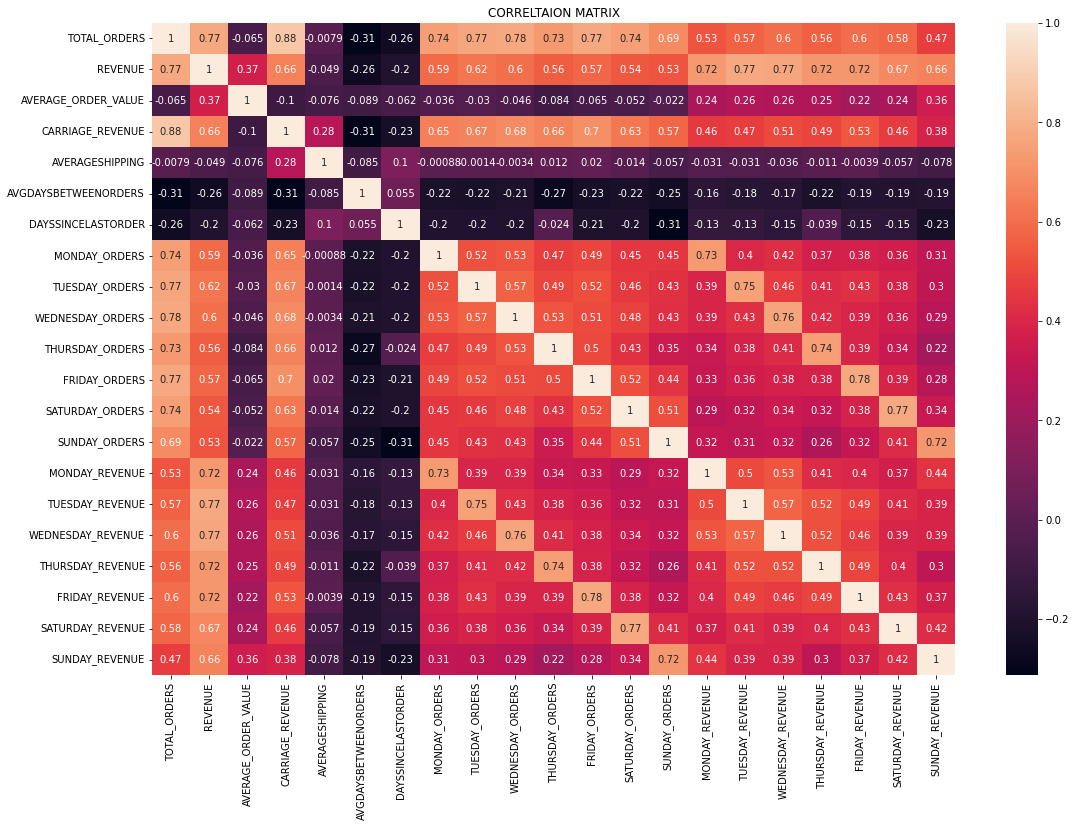

In [42]:
plt.figure(figsize = (18,12))
sns.heatmap(df1.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

### From the correaltion matrix, it is understood that most columns are not correlated to each other. Except for Day and weeks, they are highly correlated . Where as 'AVGdays' and 'Days since last order' are negatively correlated.

# EDA Summary


### From Above EDA Process we can assume that

* 156 is the Highest Ordes from a single person
* 34847 is the highest revenue from a single person
* Thursday and Sunday are the Highest in revenue and Order placed
* most Shopping happens at month End 
* some People have less order but average cost of each item is high
* If person purchaced more than 3 times he tend's to shop more

# 2) Data Transformation 
### Performing RFM Segmentation and RFM Analysis

## RFM model 

### * The idea is to divide the customer based on their Recency , Frequency , Monetary
### * RFM model will be the best fit for this data
* Recency: How much time has elapsed since a customer’s last activity or transaction with the brand
* Frequency: How often has a customer transacted or interacted with the brand during a particular period of time
* Monetary: Also referred to as “monetary value,” this factor reflects how much a customer has spent with the brand during a particular period of time.

### 1) Recency

Recency factor is based on the notion that the more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases. This information can be used to remind recent customers to revisit the business soon to continue meeting their purchase needs.

now we calculate recency using our data set

In [43]:
df.head()

CustomerID  TOTAL_ORDERS   REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22           124  11986.54                96.67            529.59   
1          29            82  11025.96               134.46             97.92   
2          83            43   7259.69               168.83            171.69   
3          95            44   6992.27               158.92             92.82   
4         124            55   6263.44               113.88            179.04   

   AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  AVGDAYSBETWEENORDERS  \
0             4.27        30-Dec-16         24-Oct-21                 14.19   
1             1.19        31-Mar-18         24-Oct-21                 15.89   
2             3.99        30-Nov-17         24-Oct-21                 33.12   
3             2.11         9-Apr-19         24-Oct-21                 21.11   
4             3.26        23-Oct-20         24-Oct-21                  6.65   

   DAYSSINCELASTORDER  ...  WEEK3_DAY16_DAY23_REVENUE  \
0                   1  ...                    2592.18   
1                   1  ...                    2807.66   
2                   1  ...                     713.94   
3                   1  ...                     997.02   
4                   1  ...                    2725.66   

   WEEK4_DAY24_DAY31_REVENUE  TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  \
0                    2409.71                     12                     61   
1                    4106.19                      1                     13   
2                    2861.90                      0                      6   
3                    1260.08                      0                     10   
4                     768.46                      6                      9   

   TIME_1200_1800_ORDERS  TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  \
0                     37                     14                 1067.92   
1                     24                     44                   30.25   
2                     12                     25                    0.00   
3                     13                     21                    0.00   
4                     27                     13                  501.34   

   TIME_0601_1200_REVENUE  TIME_1200_1800_REVENUE  TIME_1801_2359_REVENUE  
0                 5674.65                 3916.53                 1327.44  
1                 3143.69                 2205.47                 5646.55  
2                  707.98                 2560.91                 3990.80  
3                 1908.99                 2025.05                 3058.23  
4                 1197.83                 3004.77                 1559.50  

[5 rows x 40 columns]

In [44]:
# convert to date time
df['Date']= pd.to_datetime(df['LATEST_ORDER_DATE'])


In [45]:
# grouping the based on customerID and laste date of order
df_RFM = df.groupby(by='CustomerID',as_index=False)['Date'].max()

In [46]:
# recent date will be the latest order amoung all orders
recent_date = df_RFM['Date'].max()

In [47]:
# as defination Recency is latest order date - last date of that customer ordered
df_RFM['Recency'] = df_RFM['Date'].apply(lambda x: (recent_date - x).days)

In [48]:
df_RFM.head()

CustomerID       Date  Recency
0           1 2021-09-02       52
1           2 2021-07-23       93
2           3 2021-09-02       52
3           4 2021-10-20        4
4           5 2021-06-17      129

### 2) Frequency
The frequency of a customer’s transactions may be affected by factors such as the type of product, the price point for the purchase, and the need for replenishment or replacement. Predicting this can assist marketing efforts directed at reminding the customer to visit the business again.



alredy we have total-order from each customer so the frequency will be easy to find

In [49]:
df_RFM['Frequency'] = df['TOTAL_ORDERS']

### 3) Monetary Value
Monetary value stems from how much the customer spends. A natural inclination is to put more emphasis on encouraging customers who spend the most money to continue to do so. While this can produce a better return on investment in marketing and customer service, it also runs the risk of alienating customers who have been consistent but may not spend as much with each transaction.


* in this data set we have carriage revenue 
* we should minus this value from total revenue of  customer to get our exact profit

In [50]:
df_RFM['Monetary'] = df['REVENUE'] - df['CARRIAGE_REVENUE']

In [51]:
df_RFM.drop('Date', inplace=True, axis=1)

In [52]:
df_RFM.head()

CustomerID  Recency  Frequency  Monetary
0           1       52        124  11456.95
1           2       93         82  10928.04
2           3       52         43   7088.00
3           4        4         44   6899.45
4           5      129         55   6084.40

C:\Users\prajw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prajw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prajw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

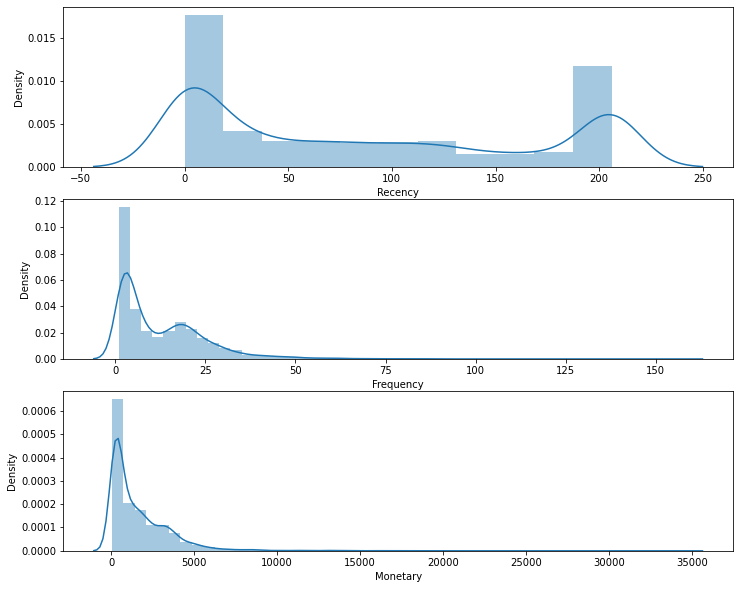

In [53]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df_RFM['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df_RFM['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df_RFM['Monetary'])
# Show the plot
plt.show()

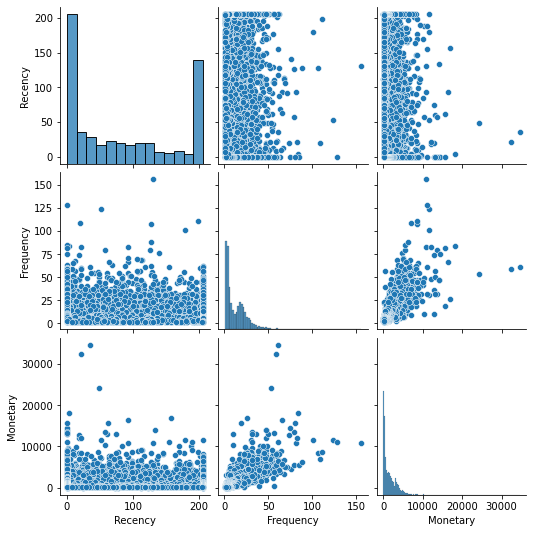

In [54]:
sns.pairplot(df_RFM[['Recency','Frequency','Monetary']])

## By Analysing both plots we can say that


* we can see that in recency, that we have some regulars who are buying frequently as some customer who are we loseing at starting of graph and ending
* and we can see that higher the frequency higher is the revenue from customers
* There are many recent purchaces with higher monetary value than older purchases.
* Frequency and monetary variables have slight linear trend.

### There are some customers who are potential outliers, but these cannot be removed because, for example there is a customerID 1 have high revenue but less order compared to customerID26. He could be vital to the business. There is also another customer who has frequently billed a high value. Hence, if these are removed, business could miss classifying their main customers, who could potentially be of high value in the future also.

In [55]:
from sklearn.preprocessing import StandardScaler, Normalizer
rfm_df_copy = df_RFM.copy()
rfm_df_copy.set_index('CustomerID', inplace= True)

In [56]:
scaler = StandardScaler()
normal = Normalizer()
scaled_data = scaler.fit_transform(rfm_df_copy)
scaled_data = normal.fit_transform(scaled_data)
rfm_scaled = pd.DataFrame(scaled_data, columns = ['Recency','Frequency','Monetary'])
rfm_scaled.set_index(rfm_df_copy.index, inplace=True)

In [57]:
rfm_scaled.describe()

Recency    Frequency     Monetary
count  5000.000000  5000.000000  5000.000000
mean     -0.060526    -0.072436    -0.097299
std       0.677550     0.543473     0.476845
min      -0.999823    -0.999237    -0.996170
25%      -0.704506    -0.521817    -0.463232
50%      -0.209647    -0.314139    -0.318324
75%       0.733205     0.438643     0.296378
max       0.999963     0.999533     0.996846

# 4) Clustering

In [58]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [59]:
# Creating an kmeans model
kmeans = KMeans()

### KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, we use elbow method and silhouette analysis to get the number of optimal clusters

In [60]:
def elbow_method(X):
  
  
    metrics = ['distortion', 'calinski_harabasz', 'silhouette']
  
    for m in metrics:
        visualizer = KElbowVisualizer(kmeans, k = (2,10), metric = m)
        visualizer.fit(X)
        visualizer.poof()

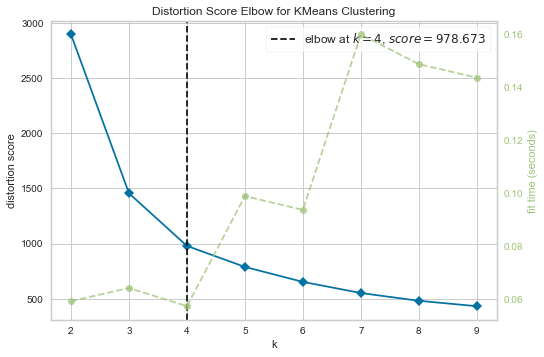

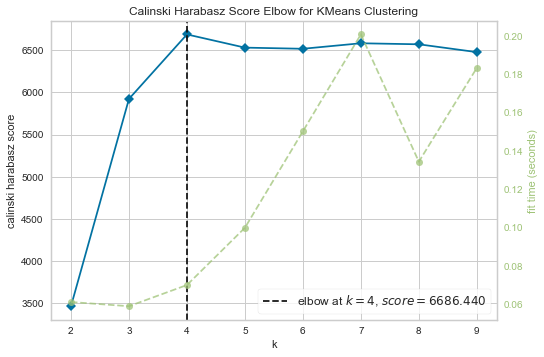

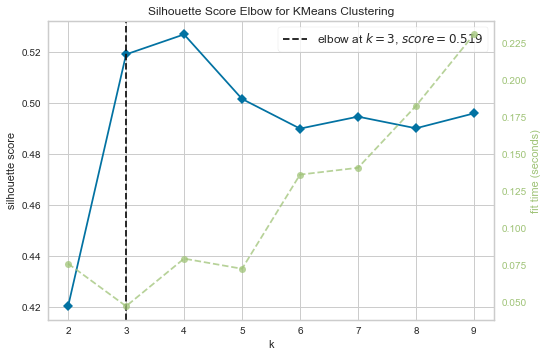

In [61]:
# Using the elbow method function to understand optimum number of clusters
elbow_method(rfm_scaled)

## From the elbow method  it is clearly understood that, 4 clusters is performing the best. Hence, 4 clusters will be selected to build the KMeans model and classify the customers.

In [62]:
kmeans = KMeans(n_clusters = 4, random_state=10)

In [63]:
kmeans.fit(rfm_scaled)

KMeans(n_clusters=4, random_state=10)

In [64]:
labels = kmeans.predict(rfm_scaled)
rfm_df_copy['Cluster'] = labels
rfm_df_copy.head(10)

Recency  Frequency  Monetary  Cluster
CustomerID                                       
1                52        124  11456.95        3
2                93         82  10928.04        3
3                52         43   7088.00        0
4                 4         44   6899.45        0
5               129         55   6084.40        3
6                31         49   5744.40        0
7               115         43   5341.50        3
8                61         54   4963.00        0
9               111         19   4915.15        3
10               12         21   4662.50        0

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

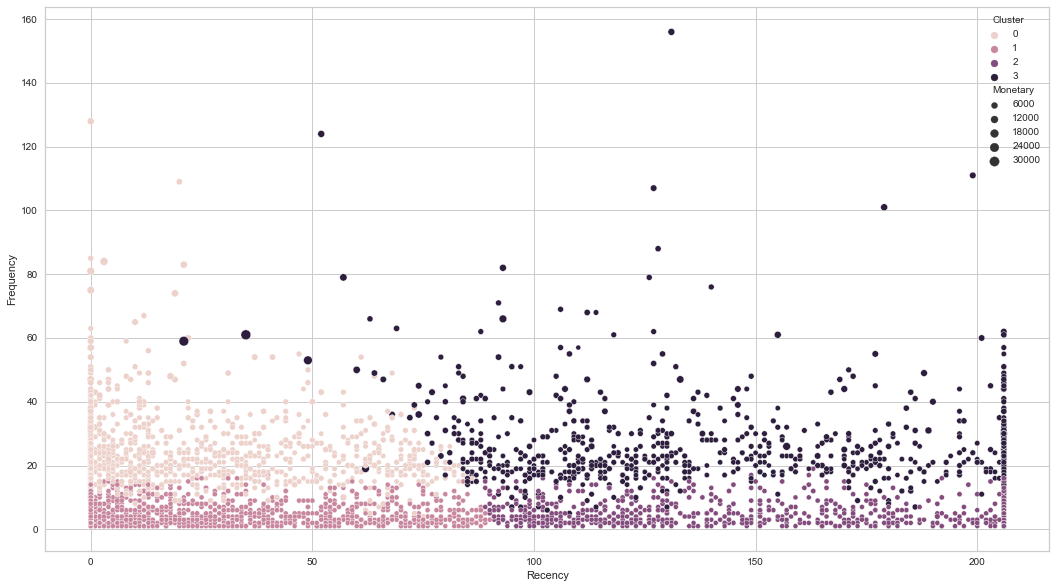

In [65]:
plt.figure(figsize = (18,10))
sns.scatterplot(x = rfm_df_copy['Recency'], y = rfm_df_copy['Frequency'], size= rfm_df_copy['Monetary'], hue = rfm_df_copy['Cluster'])

### Making groups of Recency, Frequency, Monetary and Calculating Score

In [66]:
# Grouping by clusters to understand the profiles
rfm_df_copy.groupby('Cluster').mean()

Recency  Frequency     Monetary
Cluster                                    
0         19.139968  23.250000  3028.428163
1         23.205805   4.990106   541.483694
2        175.164029   4.393525   456.629554
3        151.264569  25.574592  3471.673368

In [67]:
# Number of customers belonging to each cluster
rfm_df_copy['Cluster'].value_counts()

1    1516
2    1390
0    1236
3     858
Name: Cluster, dtype: int64

# 5) Segmentation
## potential customer segmentation using RFM model and some meaningful insights from each segment.


### Score 10 and above are "Champions" and there are in top 25%
### Score 8 and above but below 10 are "Loyal" and there are in top 50%
### Score 5 and above but below 8 are "Potential customers" and there are in top 75%
### Score 4 and above but below 5 are "promising customers"
### Score below 4 are Requires Attention
### Champions and  belongs to cluster 3
### Loyal customers belongs to cluster 2
### Potential customers  belongs to cluster 1
### Requires Attention belongs to cluster 0

In [68]:
df_RFM.head()

CustomerID  Recency  Frequency  Monetary
0           1       52        124  11456.95
1           2       93         82  10928.04
2           3       52         43   7088.00
3           4        4         44   6899.45
4           5      129         55   6084.40

In [69]:
#Calculating R and F groups
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); 
f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(df_RFM['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(df_RFM['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values)
# Create labels for Monetary
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df_RFM['Monetary'], q=4, labels=m_labels)
# Create new column M
df_RFM = df_RFM.assign(M = m_groups.values)
df_RFM.head()

CustomerID  Recency  Frequency  Monetary  R  F  M
0           1       52        124  11456.95  3  4  4
1           2       93         82  10928.04  2  4  4
2           3       52         43   7088.00  3  4  4
3           4        4         44   6899.45  4  4  4
4           5      129         55   6084.40  2  4  4

In [70]:
def join_rfm(x): return x['R'] + x['F'] +x['M']
df_RFM['Score'] = df_RFM.apply(join_rfm, axis=1)
df_RFM.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Score
0           1       52        124  11456.95  3  4  4   11.0
1           2       93         82  10928.04  2  4  4   10.0
2           3       52         43   7088.00  3  4  4   11.0
3           4        4         44   6899.45  4  4  4   12.0
4           5      129         55   6084.40  2  4  4   10.0

In [71]:
def customer_level(df):
    if df['Score'] >= 10:
        return 'Champions'
    elif ((df['Score'] >= 8) and (df['Score'] < 10)):
        return 'Loyal_customers'
    elif ((df['Score'] >= 5) and (df['Score'] < 8)):
        return 'Potential_customers'
    elif ((df['Score'] >= 0) and (df['Score'] < 5)):
        return 'Requires Attention'

In [72]:
df_RFM['Score_level'] = df_RFM.apply(customer_level,axis = 1)

In [73]:
df_RFM.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Score Score_level
0           1       52        124  11456.95  3  4  4   11.0   Champions
1           2       93         82  10928.04  2  4  4   10.0   Champions
2           3       52         43   7088.00  3  4  4   11.0   Champions
3           4        4         44   6899.45  4  4  4   12.0   Champions
4           5      129         55   6084.40  2  4  4   10.0   Champions

In [74]:
df['RFM_Score'] = df_RFM['Score']

In [75]:
RFM_level_agg = df_RFM.groupby('Score_level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_level_agg)

                    Recency Frequency Monetary      
                       mean      mean     mean count
Score_level                                         
Champions              31.4      25.9   3494.7  1331
Loyal_customers        86.8      15.9   1974.0  1241
Potential_customers    83.0       5.2    565.0  1602
Requires Attention    181.2       2.2    207.2   826


### I made some data adjustment for data visulization

# 6) Data visulization


### Customer Level 

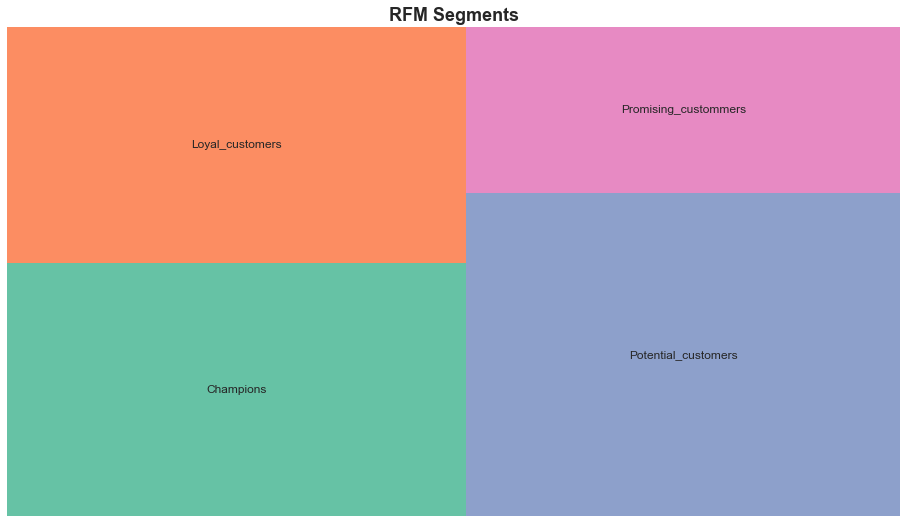

In [76]:
RFM_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_level_agg['Count'], 
              label=[
                     'Champions',
                     'Loyal_customers',
                     'Potential_customers',
                      'Promising_custommers', 
                       'Requires Attention'], alpha=1,color=plt.cm.Set2.colors )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()


### Pie chart of customer level

In [77]:
count = df_RFM.Score_level.value_counts()
name = df_RFM.Score_level.value_counts().index
fig = px.pie(df_RFM, values= count, names=name,
             title='Customer level segments',
              labels=name)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Trade of B/W Orders and Revenue

In [78]:
days = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY',
       'SUNDAY']
fig = go.Figure()
fig.add_trace(go.Bar(x=days,
                y=revenue_day['NO_of_Orders'],
                name='Orders',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=days,
                y=revenue_day['Sum_of_Revenue_in_100'],
                name='Revenue',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Trade of B/W Orders and Revenue',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Revenue * 100 for original value',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

* by observing the graph we can say that on monday we have less revenue than whole week
* Thursday has high Revenue  and Orders of the whole week
* on Saturday We have low orders


### Combianed pie chart of revenue and customer level

In [79]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY',
       'SUNDAY']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=revenue_day['Sum_of_Revenue_in_100'], name="revenue"),
              1, 1)
fig.add_trace(go.Pie(labels=name, values=count, name="Custormers"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Combianed pie chart of revenue and customer level",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DAYS', x=0.183, y=0.5, font_size=18, showarrow=False),
                 dict(text='LEVEL', x=0.82, y=0.5, font_size=18, showarrow=False)])
fig.show()

# Conclusion

### In this project, a translational dataset online store was used. The data set contained various columns. It contains data for almost a period of 7 year. The main aim of the project was to classify the customers into different segments. These segments will have a defining character of their own. This will help the business cater better to their customers which inturn could increase the profits.

## 1) data Cleaning :- the data set was clean we given

## 2) Exploratory Data Analysis (EDA)

  ### *156 is the Highest Ordes from a single person
  ### * 34847 is the highest revenue from a single person
  ### * Thursday and Sunday are the Highest in revenue and Order placed
  ### * most Shopping happens at month End
  ### * some People have less order but average cost of each item is high
  ### * If person purchaced more than 3 times he tend's to shop more

## 3) Data Transformation 
  ### * In this section, a Recency, Frequency and Monetary analysis Model was developed for each customerID

## 4) Clustering and 5) segmentation

###  * In this section, the optimum number of clusters were chosen via elbow  method It was found that 4 clusters would be the most optimum. 
### * A KMeans model with 4 clusters was developed. 
### * Each customer ID was clustered into one of the 4 clusters. and named based on their Score Champions ,  Loyal , Potential , Requires Attention 

## 6) Data Data visulization :- Ploted some pie chart and barchart for further analysis



## * On the basis of this analysis, the business can offer attractive deals to its Potential and low value customers and they can also treat their high value customers with special business offers such as loyalty points.
## * they can even make spechial day on weekday's as monday to boost their revenue on monday